In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# But what influence will it have if the modeled region is lager?

class NormVector3D:
    def __init__(self):
        self.rand_on_sphere()

    def x(self):
        return self.vec[0]
    
    def y(self):
        return self.vec[1]

    def z(self):
        return self.vec[2]

    '''
    Note the inefficiency of this implementation: about 0.1s for one rand vec
    '''
    def rand_on_sphere(self):
        for_select = np.random.rand(3) * 2 - 1
        for _ in range(int(1e2)):
            this_vec = np.random.rand(3) * 2 - 1
            if self.get_norm(this_vec) < 1:
               for_select = np.vstack((for_select, this_vec))
        row = for_select.shape[0]
        self.vec = for_select[int(np.random.rand() * row), :]
        self.normalize()
    
    def normalize(self):
        self.vec /= self.get_norm(self.vec)

    @staticmethod
    def get_norm(vec):
        if isinstance(vec, NormVector3D):
            return np.sqrt(np.sum(np.abs(vec.vec) ** 2))
        else:
            return np.sqrt(np.sum(np.abs(vec) ** 2))

    @staticmethod
    def innerProduct(vec1, vec2):
        return vec1.vec@vec2.vec




1.0


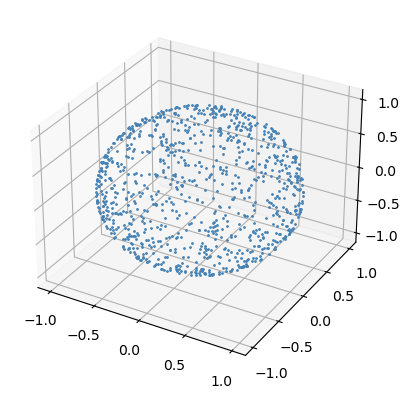

In [3]:
v = NormVector3D()
print(v.get_norm(v))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for _ in range(1000):
    v.rand_on_sphere()
    ax.scatter(v.x(), v.y(), v.z(), s=1, color='steelblue')

In [12]:
'''
Only 4 atoms in a unit cell that are independent if periodic boundary condition is adopted?
Set k_B as 1
'''
class FCC:
    def __init__(self):
        self.p1 = NormVector3D()
        self.p2 = NormVector3D()
        self.p3 = NormVector3D()
        self.p4 = NormVector3D()
    
    def get_H_total(self):
        '''
        It is obvious that 1 particle has 3 independent NNs, each with 4 couplings (periodicity). C42 = 6
        '''
        H12 = -4 * NormVector3D.innerProduct(self.p1, self.p2)
        H23 = -4 * NormVector3D.innerProduct(self.p3, self.p2)
        H13 = -4 * NormVector3D.innerProduct(self.p1, self.p3)
        H14 = -4 * NormVector3D.innerProduct(self.p1, self.p4)
        H24 = -4 * NormVector3D.innerProduct(self.p2, self.p4)
        H34 = -4 * NormVector3D.innerProduct(self.p3, self.p4)
        return H12 + H23 + H13
        
    def rand_displace(self, scale = 1):
        self.p1.vec += (np.random.random(3) * 2 - 1) * scale
        self.p2.vec += (np.random.random(3) * 2 - 1) * scale
        self.p3.vec += (np.random.random(3) * 2 - 1) * scale
        self.p4.vec += (np.random.random(3) * 2 - 1) * scale
    
        self.p1.normalize()
        self.p2.normalize()
        self.p3.normalize()
        self.p4.normalize()
    
    def avg_s(self):
        x = self.p1.x() + self.p2.x() + self.p3.x() + self.p4.x()
        y = self.p1.y() + self.p2.y() + self.p3.y() + self.p4.y()
        z = self.p1.z() + self.p2.z() + self.p3.z() + self.p4.z()
        return np.sqrt(x ** 2 + y ** 2 + z ** 2)
        
    
def MC_Heisenberg(T, N=1000):
    res = []
    fcc = FCC()
    for _ in range(N):
        last_H = fcc.get_H_total()
        res.append(copy.deepcopy(fcc))
        # print(fcc.get_H_total())
        fcc.rand_displace()
        this_H = fcc.get_H_total()
        if last_H > this_H:
            # accept
            # print('acc 1')
            pass
        else:
            acc_rate = np.exp(-(this_H - last_H) / T)
            if np.random.rand() > acc_rate:
                # reject
                # print('rej')
                fcc = copy.deepcopy(res[-1])
            else:
                # accept
                pass
                # print('acc 2')
    return res
    

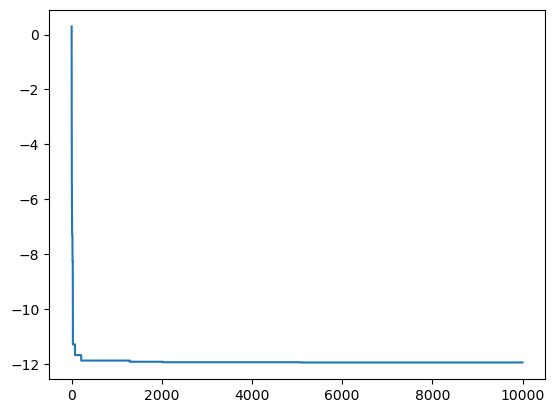

In [48]:
N = 10000
res = MC_Heisenberg(0.00001, int(N))

fig, ax = plt.subplots(1, 1)
ax.plot(list(range(len(res))), [r.get_H_total() for r in res])
# ax.plot(list(range(len(res))), [(r.p2.x()) for r in res])
# ax.plot(list(range(len(res))), [(r.p3.x()) for r in res])



# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# p1_xs = [r.p1.x() * 0.2 for r in res]
# p1_ys = [r.p1.y() * 0.2 for r in res]
# p1_zs = [r.p1.z() * 0.2 for r in res]
# arrow1 = ax.quiver(0, 0, 0, p1_xs[0], p1_ys[0], p1_zs[0])

# p2_xs = [r.p2.x() * 0.2 for r in res]
# p2_ys = [r.p2.y() * 0.2 for r in res]
# p2_zs = [r.p2.z() * 0.2 for r in res]
# arrow2 = ax.quiver(1, 1, 0, p2_xs[0], p2_ys[0], p2_zs[0])

# p3_xs = [r.p3.x() * 0.2 for r in res]
# p3_ys = [r.p3.y() * 0.2 for r in res]
# p3_zs = [r.p3.z() * 0.2 for r in res]
# arrow3 = ax.quiver(1, 0, 1, p3_xs[0], p3_ys[0], p3_zs[0])

# p4_xs = [r.p4.x() * 0.2 for r in res]
# p4_ys = [r.p4.y() * 0.2 for r in res]
# p4_zs = [r.p4.z() * 0.2 for r in res]
# arrow4 = ax.quiver(0, 1, 1, p4_xs[0], p4_ys[0], p4_zs[0])



# def update(frame):
#     global arrow1, arrow2, arrow3, arrow4
#     arrow1.remove()
#     arrow2.remove()
#     arrow3.remove()
#     arrow4.remove()
#     arrow1 = ax.quiver(0, 0, 0, p1_xs[frame], p1_ys[frame], p1_zs[frame])
#     arrow2 = ax.quiver(1, 1, 0, p2_xs[frame], p2_ys[frame], p2_zs[frame])
#     arrow3 = ax.quiver(1, 0, 1, p3_xs[frame], p3_ys[frame], p3_zs[frame])
#     arrow4 = ax.quiver(0, 1, 1, p4_xs[frame], p4_ys[frame], p4_zs[frame])
#     return
# ani = FuncAnimation(fig, update, range(N), interval=40, save_count=N, repeat=False)
# ani.save('a.mp4')
# plt.show()

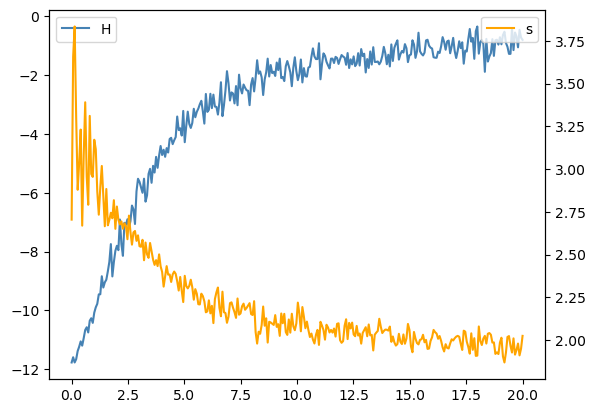

In [50]:
def avg(x, n=1000):
    try:
        return np.sum(x[-n: -1]) / n
    except:
        return np.sum(x[0: -1]) / len(x)

last_H = []
last_s = []
Ts = np.linspace(1e-100, 20, 300)
for T in Ts:
    res = MC_Heisenberg(T, 1100)
    last_H.append(avg([r.get_H_total() for r in res]))
    last_s.append(avg([r.avg_s() for r in res]))

fig, ax = plt.subplots(1, 1)
ax.plot(Ts, last_H, label='H', color='steelblue')
axT = ax.twinx()
axT.plot(Ts, last_s, label='s', color='orange')
ax.legend(loc='upper left')
axT.legend(loc='upper right')